# Load

In [44]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

OUTPUT_DIR = 'output/'

In [45]:
df = pd.read_csv(OUTPUT_DIR + 'df_all.csv')

print(df.shape)
display(df.head())

(240795, 33)


,stats_score,stats_kills,stats_deaths,stats_assists,stats_headshots,stats_bodyshots,stats_legshots,stats_damage_dealt,stats_damage_received,ability_casts_grenade,...,total_rounds,KDA Ratio,ADR,ACS,Overall Ability Cast,Win Ratio,damage_per_kills,queue_id_numeric,map_name_numeric,agent_name_numeric
0,-0.373784,-0.418093,0.856048,0.503302,-0.081188,-0.578460,-0.901913,-0.344157,1.354924,0.243616,...,0.79319,-0.551241,-0.719950,-0.731170,0.688671,-0.215257,0.112991,0,5,1
1,0.828314,0.752924,0.856048,0.800652,1.192798,-0.516386,0.068347,0.802564,0.643662,0.042060,...,0.79319,0.127553,0.442102,0.471817,-1.252211,0.274613,-0.176264,0,5,4
2,-0.067874,0.083771,1.104480,-0.091399,-0.991177,0.787160,2.655705,-0.221738,0.682217,1.553728,...,0.79319,-0.551241,-0.595894,-0.425034,1.076847,-0.215257,-0.757141,0,5,7
3,1.052361,0.920212,0.856048,-1.280799,0.646804,-0.454312,-0.255073,0.816910,0.960074,-0.461829,...,0.79319,-0.381543,0.456640,0.696029,-0.669947,-0.215257,-0.422546,0,5,2
4,0.139554,0.251059,0.110753,-0.686099,-0.081188,0.414718,1.038606,0.036489,-0.111472,-0.361052,...,0.79319,-0.251773,-0.334214,-0.217452,0.300494,0.274613,-0.582370,0,5,1


#Label Decoding

In [46]:
agent_dict = {
    'Omen': 0,
    'Sova': 1,
    'Jett': 2,
    'Chamber': 3,
    'Reyna': 4,
    'Killjoy': 5,
    'Astra': 6,
    'Cypher': 7,
    'Neon': 8,
    'Gekko': 9,
    'Clove': 10,
    'Vyse': 11,
    'Skye': 12,
    'Iso': 13,
    'Yoru': 14,
    'Raze': 15,
    'Phoenix': 16,
    'Deadlock': 17,
    'Harbor': 18,
    'KAY/O': 19,
    'Viper': 20,
    'Sage': 21,
    'Brimstone': 22,
    'Fade': 23,
    'Breach': 24
}
reversed_agent_dict = {v: k for k, v in agent_dict.items()}
df['agent_name'] = df['agent_name_numeric'].astype(int).map(reversed_agent_dict)

agent_roles = {
    0: "Controller",
    1: "Initiators",
    2: "Duelists",
    3: "Sentinels",
    4: "Duelists",
    5: "Sentinels",
    6: "Controller",
    7: "Sentinels",
    8: "Duelists",
    9: "Initiators",
    10: "Controller",
    11: "Sentinels",
    12: "Initiators",
    13: "Duelists",
    14: "Duelists",
    15: "Duelists",
    16: "Duelists",
    17: "Sentinels",
    18: "Controller",
    19: "Initiators",
    20: "Controller",
    21: "Sentinels",
    22: "Controller",
    23: "Initiators",
    24: "Initiators"
}
reversed_agent_roles = {v: k for k, v in agent_roles.items()}
df['agent_role'] = df['agent_name_numeric'].astype(int).map(agent_roles)

map_dict = {
    'Abyss': 0,
    'Split': 1,
    'Haven': 2,
    'Bind': 3,
    'Pearl': 4,
    'Ascent': 5,
    'Sunset': 6,
    'Fracture': 7,
    'Icebox': 8,
    'Lotus': 9,
    'Breeze': 10
}
reversed_map_dict = {v: k for k, v in map_dict.items()}
df['map_name'] = df['map_name_numeric'].astype(int).map(reversed_map_dict)

df.columns


Index(['stats_score', 'stats_kills', 'stats_deaths', 'stats_assists',
       'stats_headshots', 'stats_bodyshots', 'stats_legshots',
       'stats_damage_dealt', 'stats_damage_received', 'ability_casts_grenade',
       'ability_casts_ability1', 'ability_casts_ability2',
       'ability_casts_ultimate', 'tier_id', 'account_level',
       'economy_spent_overall', 'economy_spent_average',
       'economy_loadout_value_overall', 'economy_loadout_value_average',
       'total_plants', 'total_defuses', 'rounds_won', 'rounds_lost',
       'total_rounds', 'KDA Ratio', 'ADR', 'ACS', 'Overall Ability Cast',
       'Win Ratio', 'damage_per_kills', 'queue_id_numeric', 'map_name_numeric',
       'agent_name_numeric', 'agent_name', 'agent_role', 'map_name'],
      dtype='object')

#Filtering for just competitive

In [47]:
competitive_df = df[df['queue_id_numeric'] == 0]
competitive_df = competitive_df.reset_index(drop=True)

#Frequencies

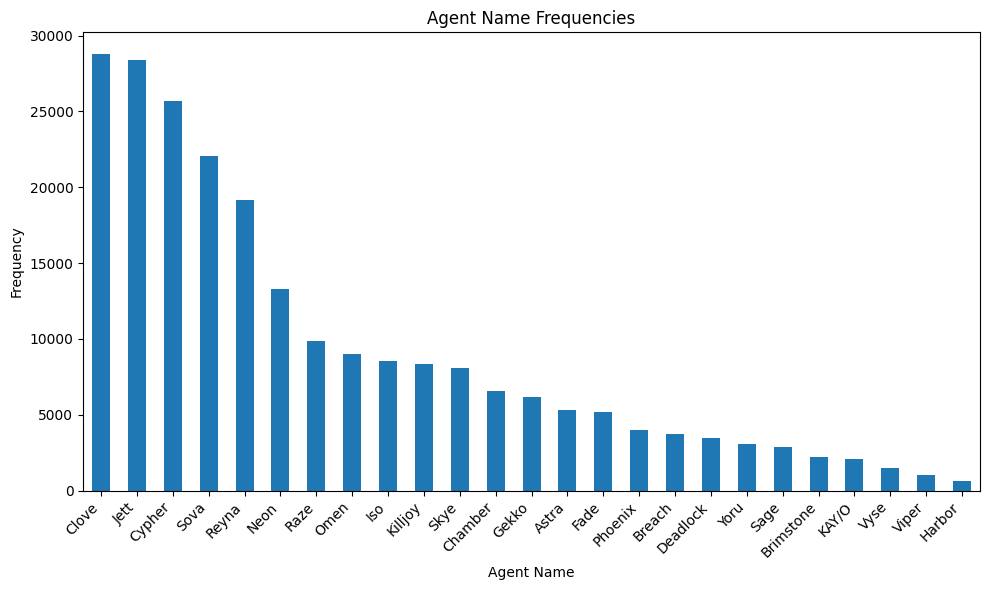

In [48]:
agent_counts = competitive_df['agent_name'].value_counts()
plt.figure(figsize=(10, 6))
agent_counts.plot(kind='bar')
plt.title('Agent Name Frequencies')
plt.xlabel('Agent Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

*   Top 4 used agents are from different agent roles.
* Caution for data interpretations given the unbalanced use of agents.

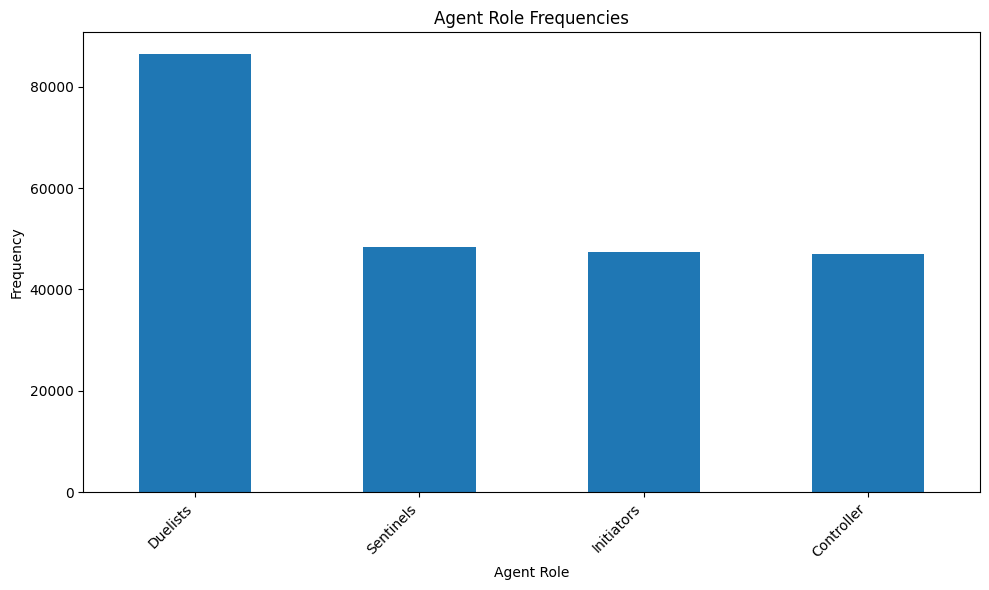

In [49]:
agent_counts = competitive_df['agent_role'].value_counts()
plt.figure(figsize=(10, 6))
agent_counts.plot(kind='bar')
plt.title('Agent Role Frequencies')
plt.xlabel('Agent Role')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

More duelists found in the dataset compared to other roles. Could be from the fact that there are more duelist agents to begin with.

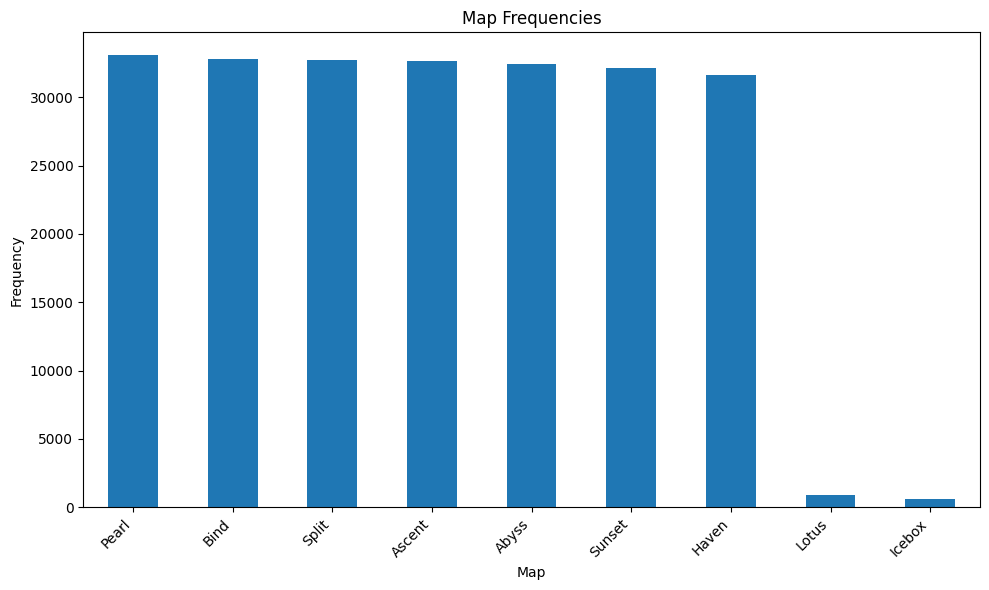

In [50]:
agent_counts = competitive_df['map_name'].value_counts()
plt.figure(figsize=(10, 6))
agent_counts.plot(kind='bar')
plt.title('Map Frequencies')
plt.xlabel('Map')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

First seven maps having similar frequencies shows that the map randomization is fair. The last 2 is due to its omission in competitive games.

#Principal Component Analysis

In [51]:
# Get features to be included in the analysis
X = competitive_df.iloc[:,:-6]
X.columns

Index(['stats_score', 'stats_kills', 'stats_deaths', 'stats_assists',
       'stats_headshots', 'stats_bodyshots', 'stats_legshots',
       'stats_damage_dealt', 'stats_damage_received', 'ability_casts_grenade',
       'ability_casts_ability1', 'ability_casts_ability2',
       'ability_casts_ultimate', 'tier_id', 'account_level',
       'economy_spent_overall', 'economy_spent_average',
       'economy_loadout_value_overall', 'economy_loadout_value_average',
       'total_plants', 'total_defuses', 'rounds_won', 'rounds_lost',
       'total_rounds', 'KDA Ratio', 'ADR', 'ACS', 'Overall Ability Cast',
       'Win Ratio', 'damage_per_kills'],
      dtype='object')

In [52]:
X.shape

(229045, 30)

In [53]:
# Checking for highly correlated features

correlation_matrix = X.corr()

highly_correlated_pairs = set()
for feature1 in correlation_matrix.columns:
    for feature2 in correlation_matrix.index:
        if feature1 != feature2 and correlation_matrix.loc[feature1, feature2] >= 0.8:
            pair = tuple(sorted((feature1, feature2)))
            highly_correlated_pairs.add(pair)

for pair in highly_correlated_pairs:
    print(f"{pair[0]} and {pair[1]}: {correlation_matrix.loc[pair[0], pair[1]]:.2f}")

economy_spent_overall and stats_damage_received: 0.81
ACS and stats_score: 0.88
Win Ratio and rounds_won: 0.85
economy_spent_overall and total_rounds: 0.88
stats_damage_dealt and stats_kills: 0.95
stats_damage_received and stats_deaths: 0.94
ADR and stats_damage_dealt: 0.87
stats_headshots and stats_kills: 0.84
stats_headshots and stats_score: 0.84
stats_damage_dealt and stats_score: 0.98
ACS and stats_damage_dealt: 0.84
ADR and stats_kills: 0.85
ACS and ADR: 0.97
stats_kills and stats_score: 0.98
ADR and stats_score: 0.86
ACS and stats_kills: 0.88
economy_loadout_value_overall and total_rounds: 0.90
stats_damage_dealt and stats_headshots: 0.85
economy_loadout_value_overall and economy_spent_overall: 0.83


Highly correlated features are examined to see potential relationships that can be combined in the principal components.

In [54]:
# PCA proper
pca = PCA()

X_pca = pca.fit_transform(X)

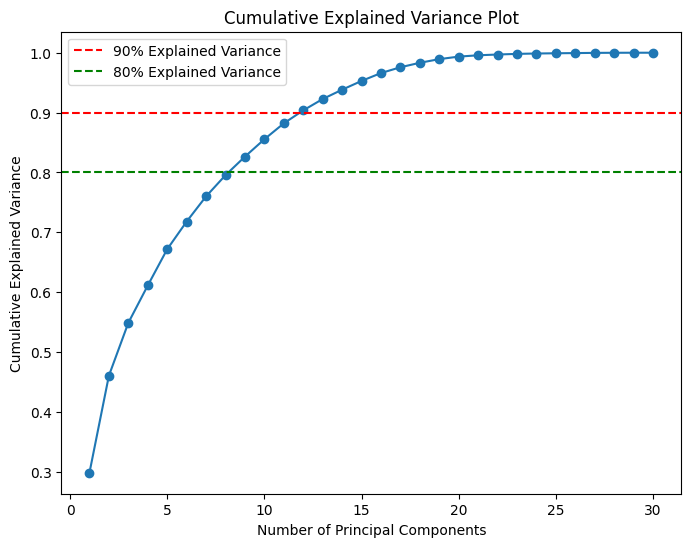

Number of components for 90% variance: 12
Number of components for 80% variance: 9


In [55]:
# Cumulative Variance Explained
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Explained Variance')
plt.axhline(y=0.8, color='g', linestyle='--', label='80% Explained Variance')
plt.legend()
plt.show()
n_components_90 = np.argmax(cumulative_variance >= 0.9) + 1
print(f"Number of components for 90% variance: {n_components_90}")
n_components_80 = np.argmax(cumulative_variance >= 0.8) + 1
print(f"Number of components for 80% variance: {n_components_80}")

The cumulative variance explained chart shows that 9-12 principal components are needed to explain 80%-90% of the variability in the data.

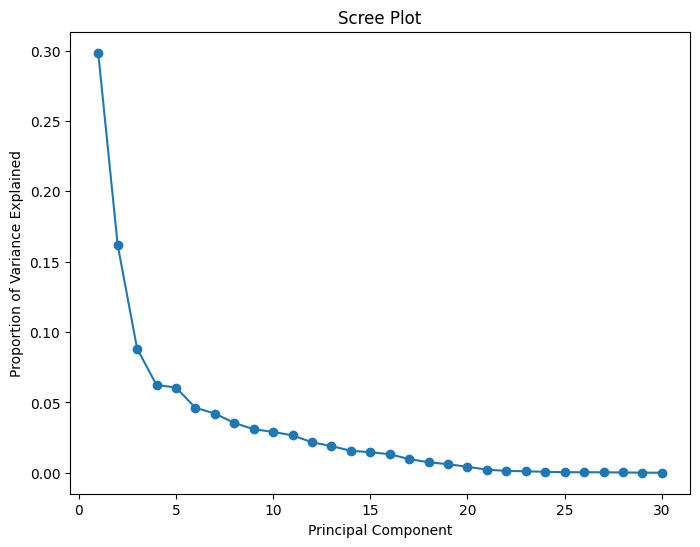

In [56]:
# Scree Plot
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

However, in the scree plot, 6 would be reasonable visually. It only explains 71.8% of the variability.

In [57]:
# Table of Eigenvalues and Variance Explained
scree_df = pd.DataFrame({
    'Principal Component': range(1, pca.n_components_ + 1),
    'Eigenvalue': pca.explained_variance_,
    'Explained Variance Ratio': pca.explained_variance_ratio_,
    'Cumulative Explained Variance': pca.explained_variance_ratio_.cumsum()
})

print(scree_df.to_string(index=False))

 Principal Component  Eigenvalue  Explained Variance Ratio  Cumulative Explained Variance
                   1    8.958848                  0.298548                       0.298548
                   2    4.862365                  0.162035                       0.460583
                   3    2.649878                  0.088306                       0.548889
                   4    1.871308                  0.062360                       0.611249
                   5    1.817901                  0.060580                       0.671830
                   6    1.386209                  0.046195                       0.718024
                   7    1.262108                  0.042059                       0.760083
                   8    1.063554                  0.035442                       0.795525
                   9    0.928385                  0.030938                       0.826463
                  10    0.871283                  0.029035                       0.855498
          

Following the Kaiser Criterion, there should be 8 PCs with eigenvalues greater than 1. This gives 79.5% of explained variability. This strikes a balance between the cumulative variance and scree plot methods.

In [58]:
num_pc = 8
cumulative_variance_at_num_pc = cumulative_variance[num_pc - 1]
print(f"Cumulative variance at {num_pc} PCs: {cumulative_variance_at_num_pc*100:.4f}")

Cumulative variance at 8 PCs: 79.5525


In [59]:
pca_final = PCA(n_components=num_pc)
X_pca_final = pca_final.fit_transform(X)

pc_df = pd.DataFrame(data=X_pca_final, columns=[f'PC{i}' for i in range(1, num_pc+1)])

df2 = pd.concat([X, competitive_df.iloc[:, -6:], pc_df], axis=1)

In [60]:
df2.shape

(229045, 44)

In [61]:
df2.columns

Index(['stats_score', 'stats_kills', 'stats_deaths', 'stats_assists',
       'stats_headshots', 'stats_bodyshots', 'stats_legshots',
       'stats_damage_dealt', 'stats_damage_received', 'ability_casts_grenade',
       'ability_casts_ability1', 'ability_casts_ability2',
       'ability_casts_ultimate', 'tier_id', 'account_level',
       'economy_spent_overall', 'economy_spent_average',
       'economy_loadout_value_overall', 'economy_loadout_value_average',
       'total_plants', 'total_defuses', 'rounds_won', 'rounds_lost',
       'total_rounds', 'KDA Ratio', 'ADR', 'ACS', 'Overall Ability Cast',
       'Win Ratio', 'damage_per_kills', 'queue_id_numeric', 'map_name_numeric',
       'agent_name_numeric', 'agent_name', 'agent_role', 'map_name', 'PC1',
       'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'],
      dtype='object')

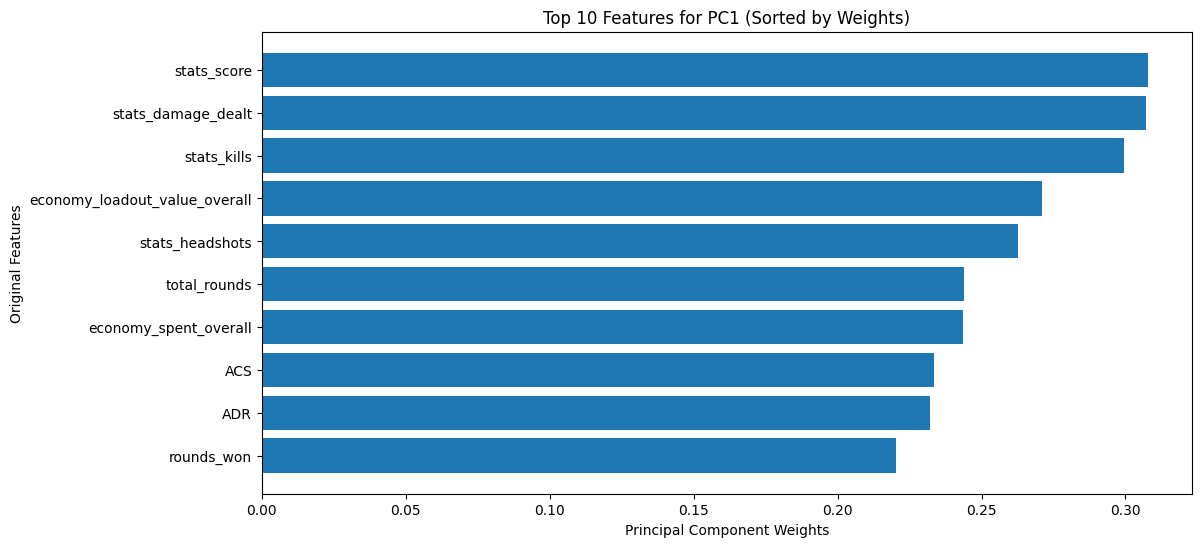

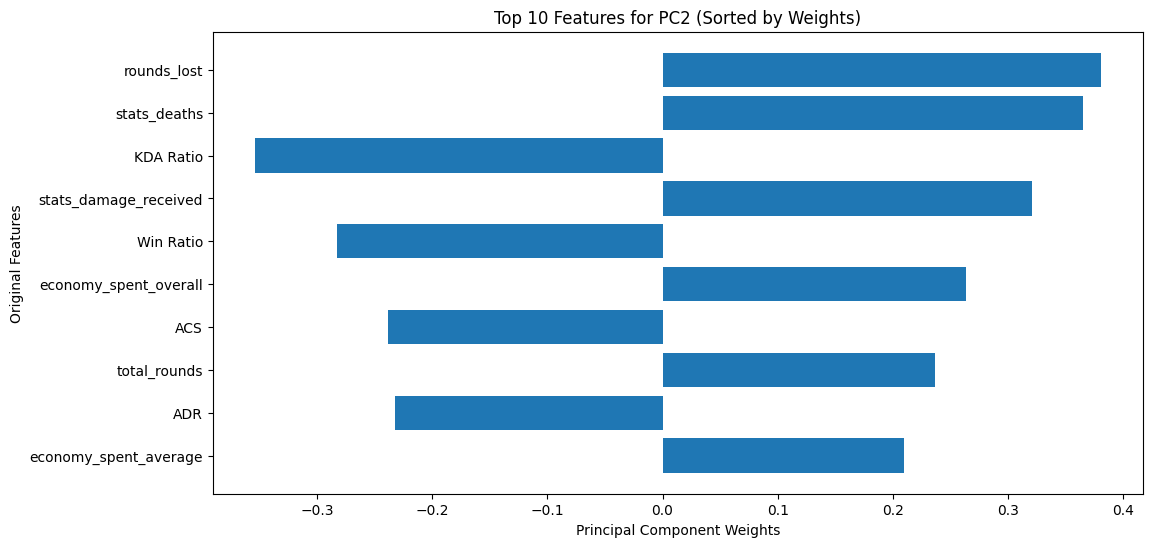

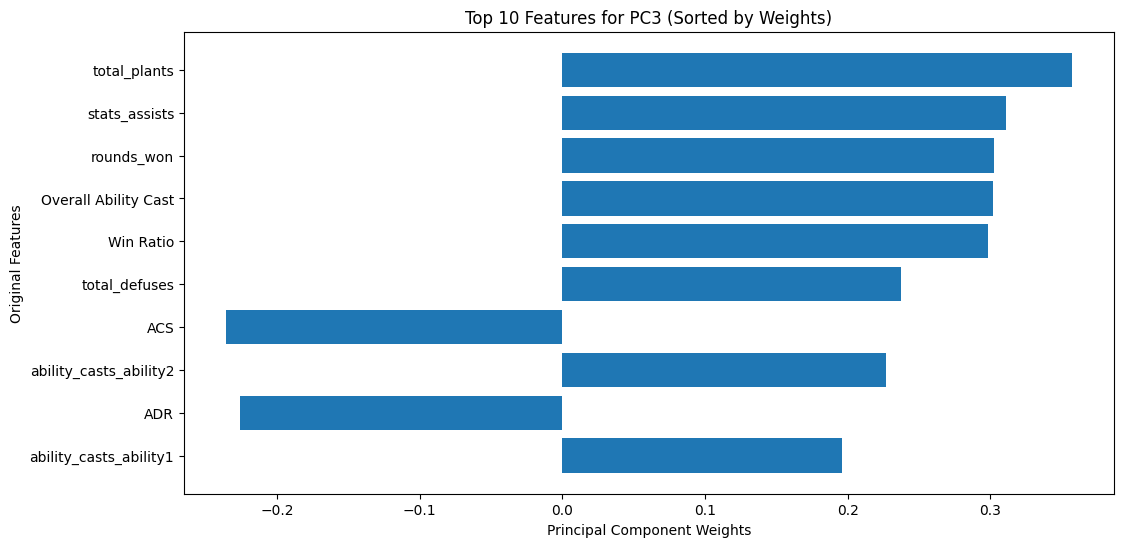

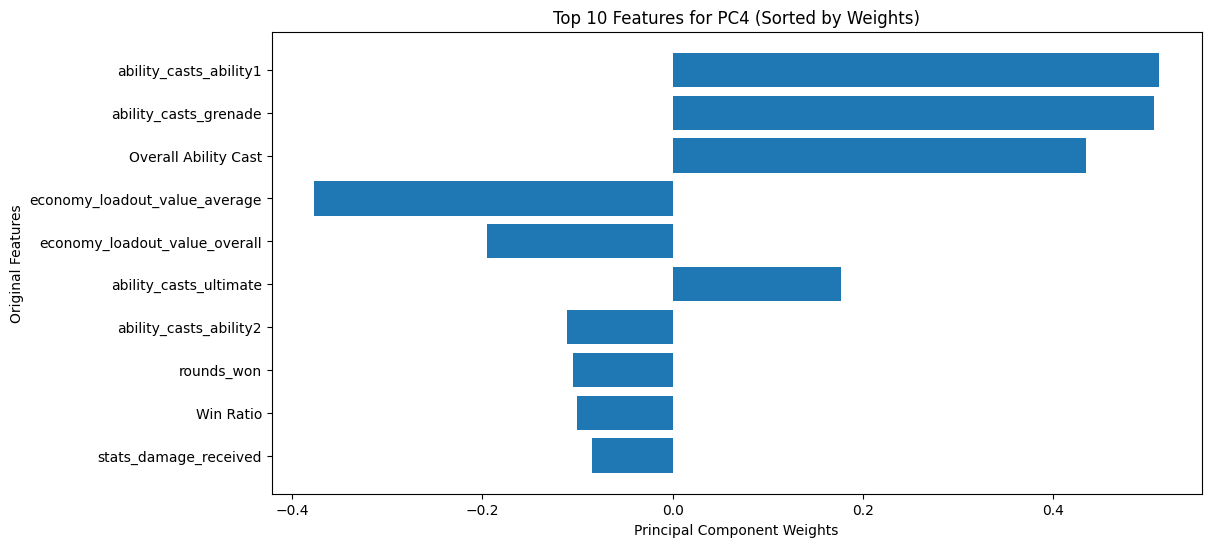

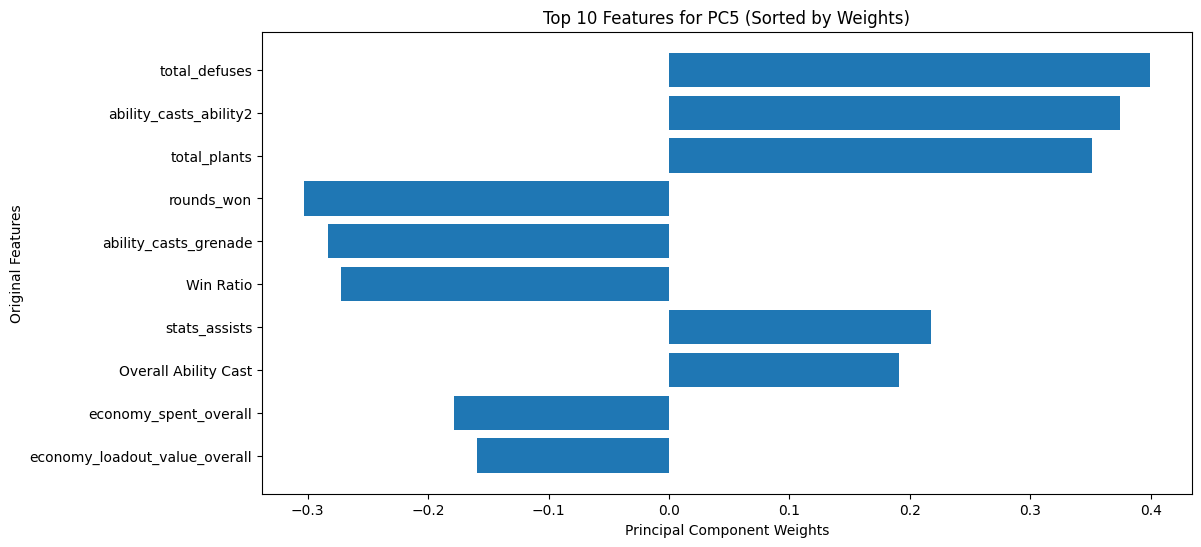

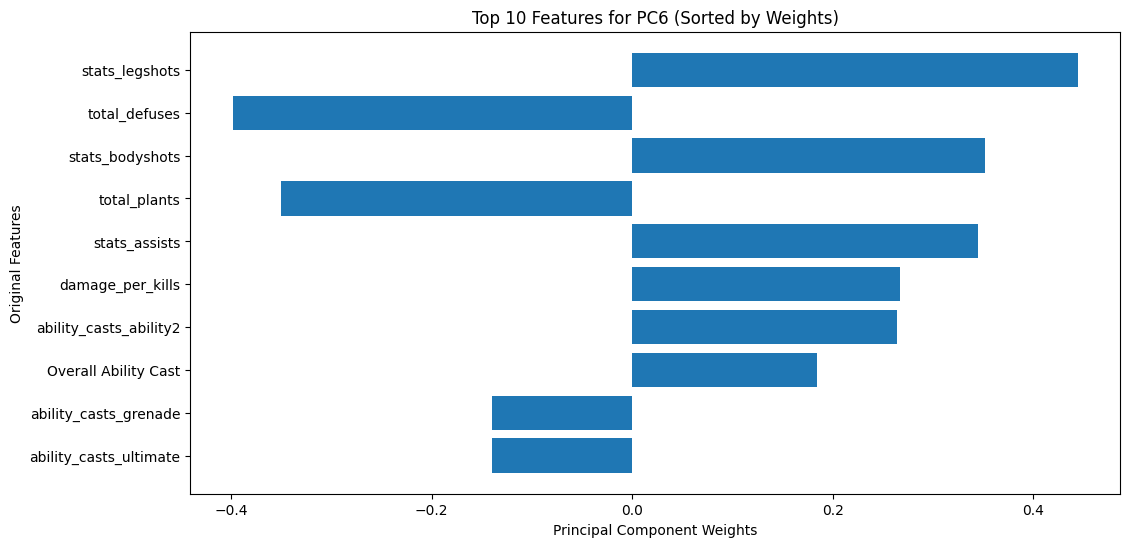

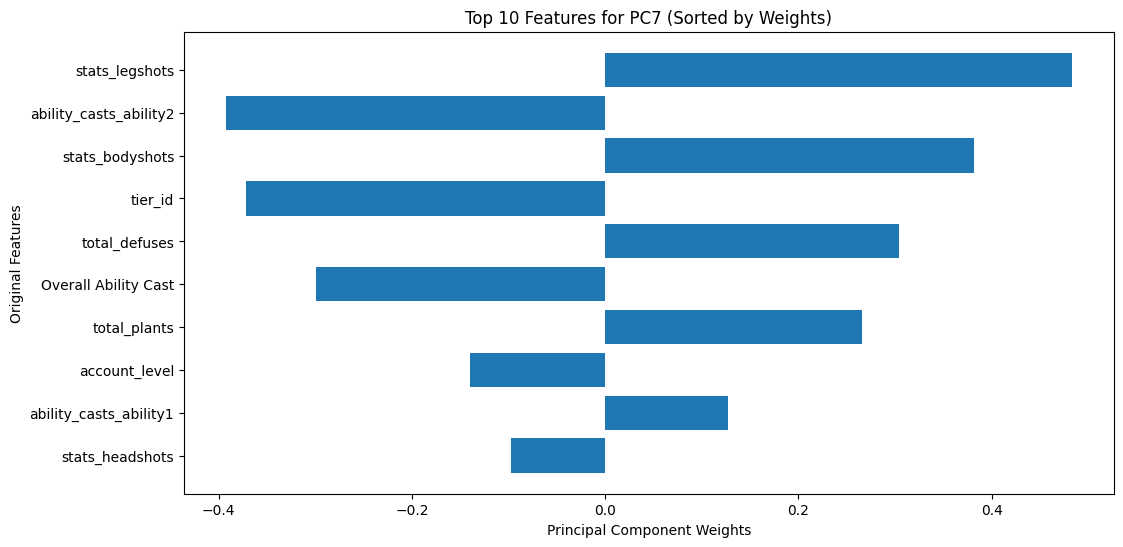

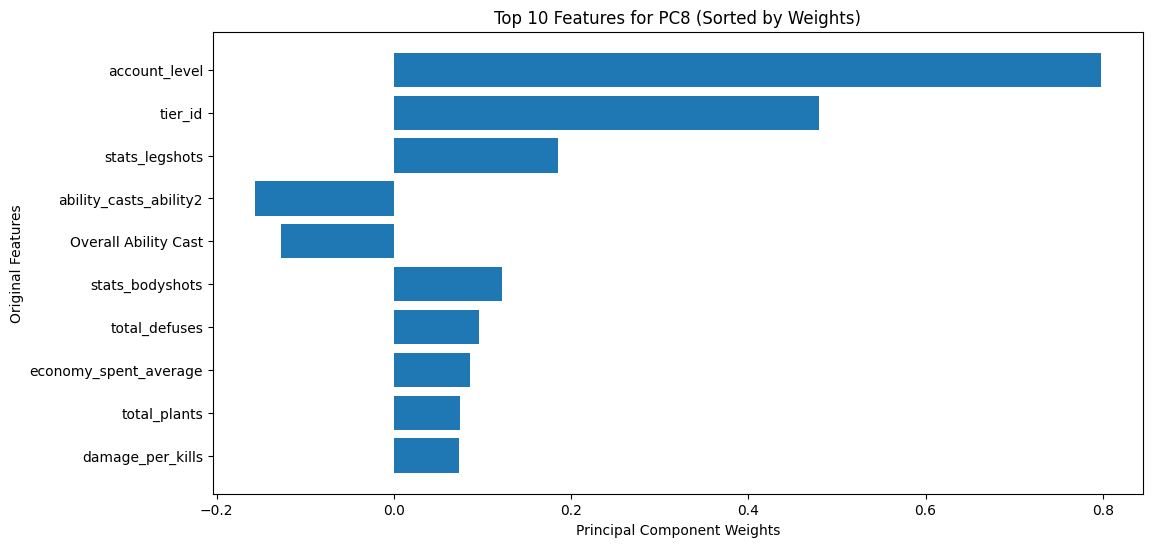

In [62]:
# Plots for top 10 features per PC
num_features = X.shape[1]
feature_names = X.columns

for i in range(1, num_pc+1):
    plt.figure(figsize=(12, 6))

    weights = pca_final.components_[i - 1]
    sorted_indices = np.argsort(np.abs(weights))[-10:]
    sorted_weights = weights[sorted_indices]
    sorted_feature_names = feature_names[sorted_indices]

    plt.barh(sorted_feature_names, sorted_weights)
    plt.xlabel('Principal Component Weights')
    plt.ylabel('Original Features')
    plt.title(f'Top 10 Features for PC{i} (Sorted by Weights)')
    plt.show()

Some findings:
- PC1 seems to be more on the positive performace with high kills, damage dealt, economy usage, and rounds one. This could be an agressive play style that leads to victories. We will call this PC `Combat Prowess` to emphasize the skill and effectiveness in combat.
- PC2 deals more on rounds lost, deaths, and damage received, while being negatively impacted by the KDA and win ratios. This seems like a losing component attributed to getting damaged in-game. We will call this PC `Fragility Factor` for its susceptability to damage and negative outcomes.
- PC3 has the objective of planting the spike grouped with number of assists and ability usage which could indicate some supportive plays that lead to securing the planting of the spike. We will call it `Utility-Based Teamwork` to highlight role of utility in facilitating teamwork and achieving objectives.
- PC4 is characterized by high ability usage across various types, coupled with lower spending on weapons and a negative impact on win ratio. This suggests a playstyle that prioritizes abilities over traditional gunplay, potentially at the cost of consistent victories. We will call this PC `Ability Focus`.
- PC5 highlights players who prioritize both planting and defusing the Spike, utilizing abilities strategically to achieve these objectives. However, it also reflects a tendency towards unconventional strategies that may not always result in wins. This is because simply planting the Spike doesn't guarantee victory; the opposing team still has the opportunity to defuse.  We call this PC `Calculated Objective Play` to emphasize the strategic focus on both sides of objective play, acknowledging the complex relationship between these actions and winning.
- PC6 displays a pattern of strong gunplay with high leg and body shots, coupled with consistent assists and varied ability usage.  Plants and defuses have negative weights here. This suggests a playstyle focused on supporting the team through consistent damage and enabling kills, rather than directly securing objectives. We'll call this PC `Gunfire Support` to emphasize this supportive role through their firearm skills.
- PC7 demonstrates a playstyle where gun skills are directly used to facilitate objective-based actions. The positive weights for plants and defuses and strong indicators of gunplay like leg and body shots, suggest players who actively use their weapons to create opportunities to plant or defuse the Spike. We'll call this PC `Objective-Focused Gunplay` to capture this direct link between firearm skills and achieving in-game goals.
- PC8 is dominated by "account_level" and "tier_id," clearly indicating that this component captures elements related to player experience and rank within the game. This suggests that PC8 may represent a progression axis, where higher scores correlate with more experienced players who have reached higher ranks.  While some minor weights on gunplay and ability usage exist, they are secondary to the overwhelming emphasis on player level and tier. We'll call this PC `Player Progression` to reflect this central theme.

In [63]:
pc_names = {
    1: "Combat Prowess",
    2: "Fragility Factor",
    3: "Utility-Based Teamwork",
    4: "Ability Focus",
    5: "Calculated Objective Play",
    6: "Gunfire Support",
    7: "Objective-Focused Gunplay",
    8: "Player Progression"
}

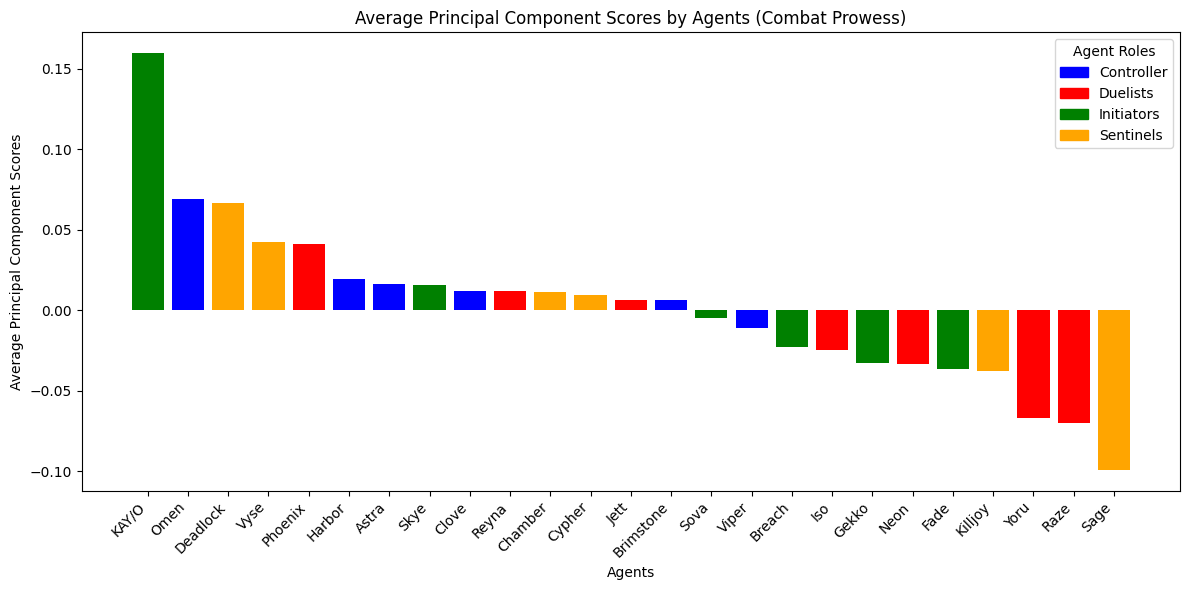

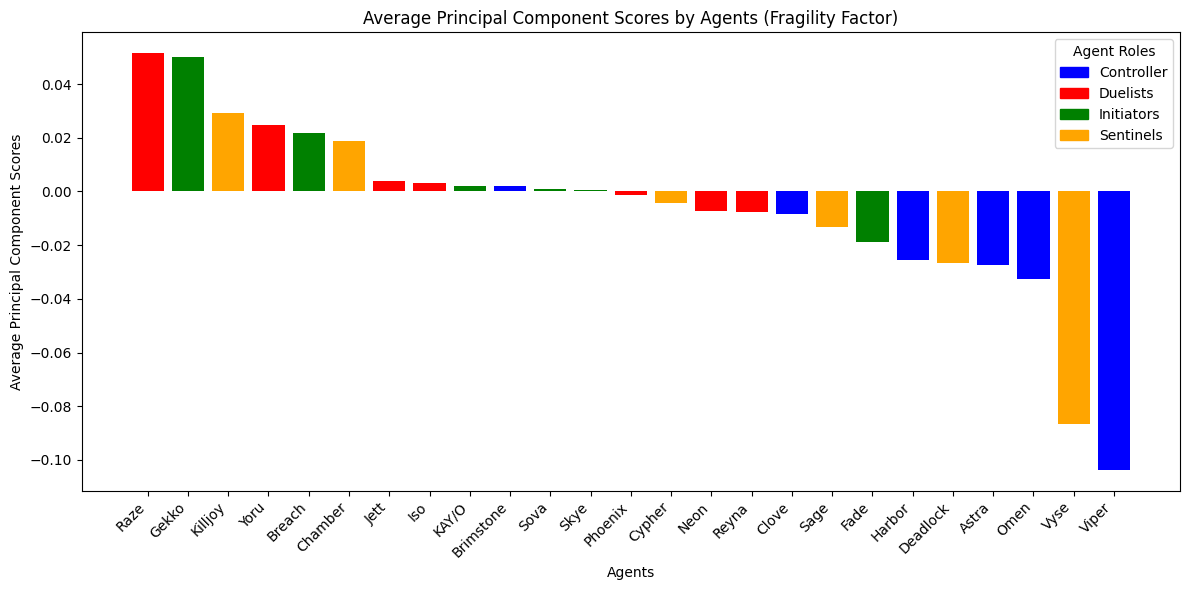

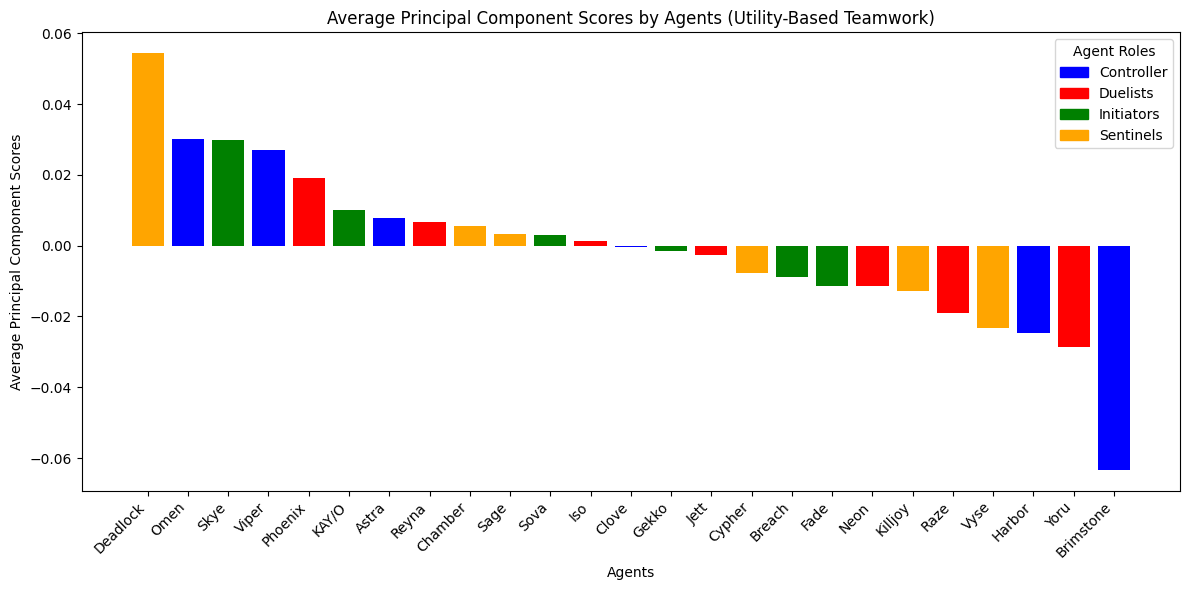

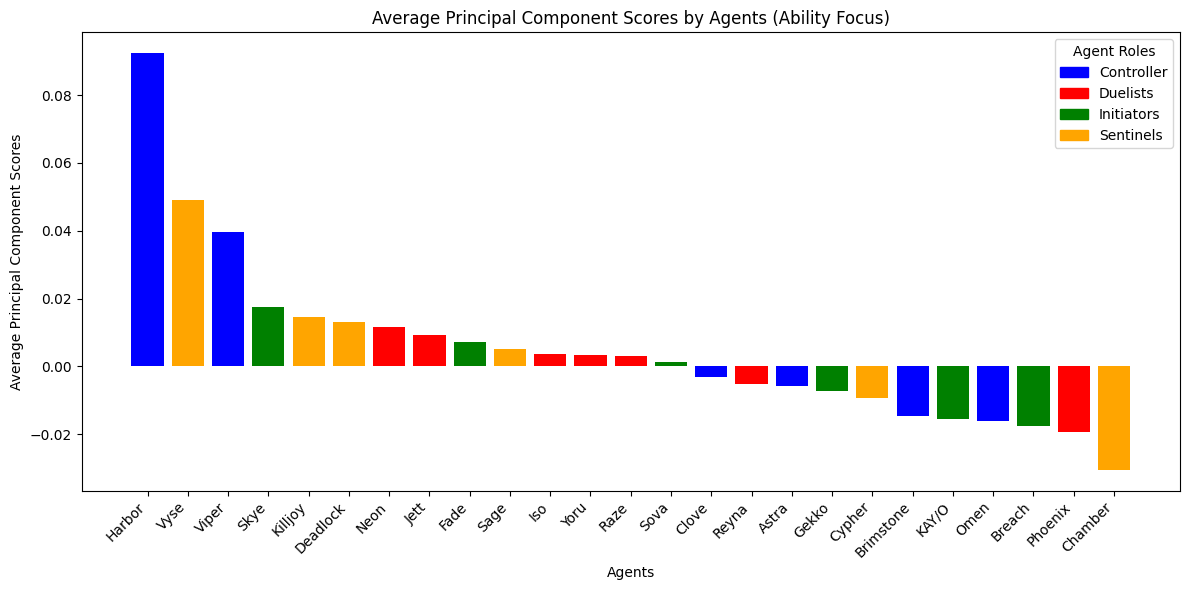

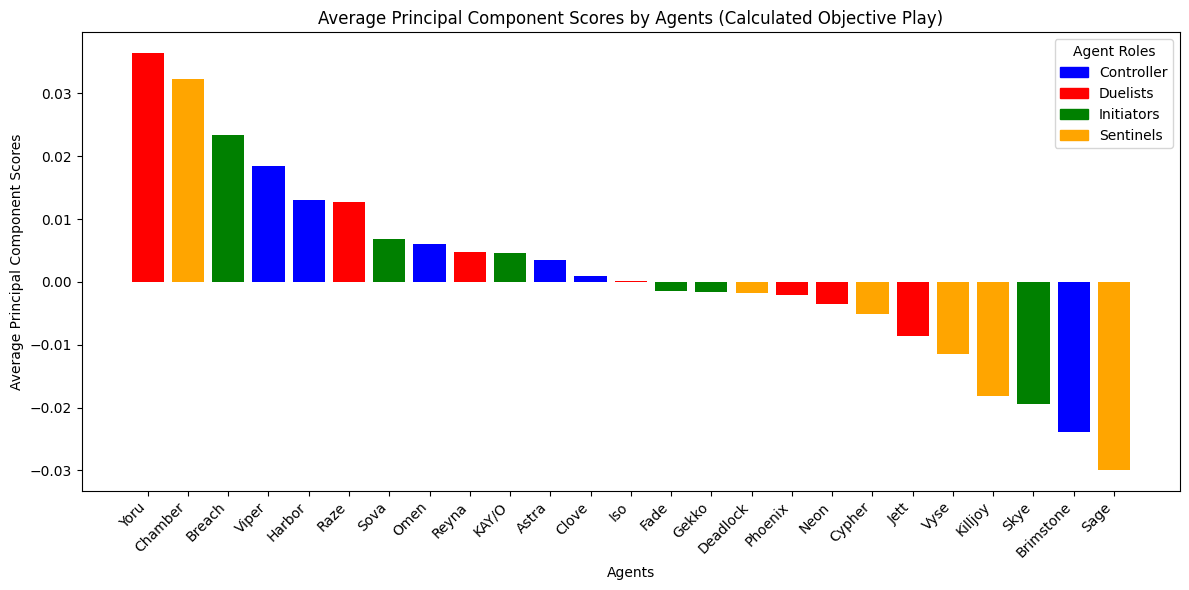

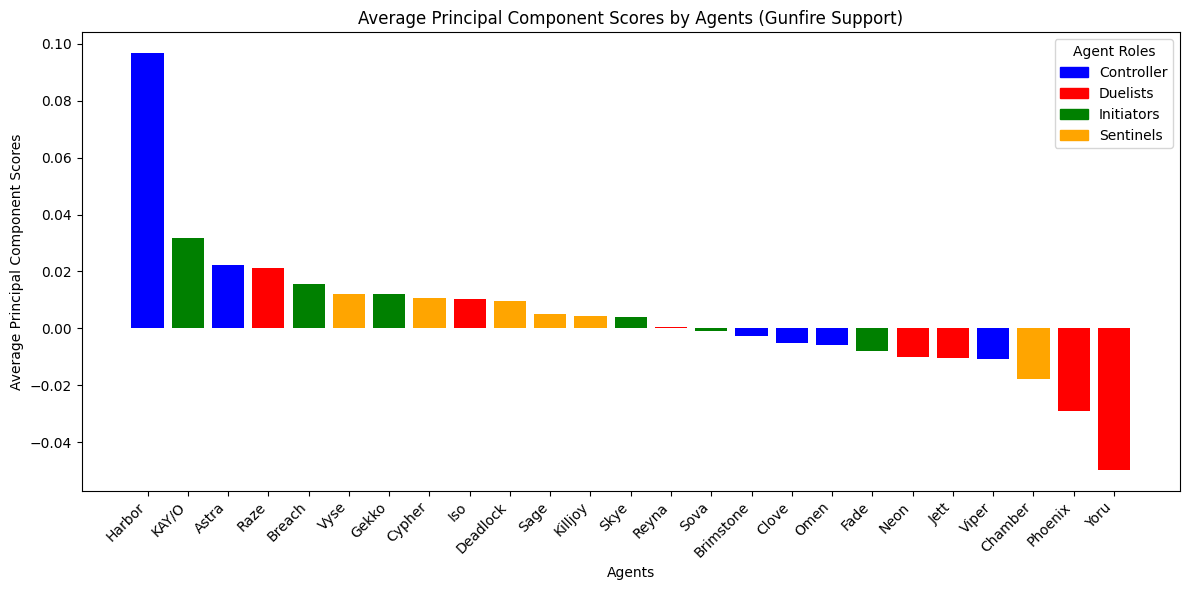

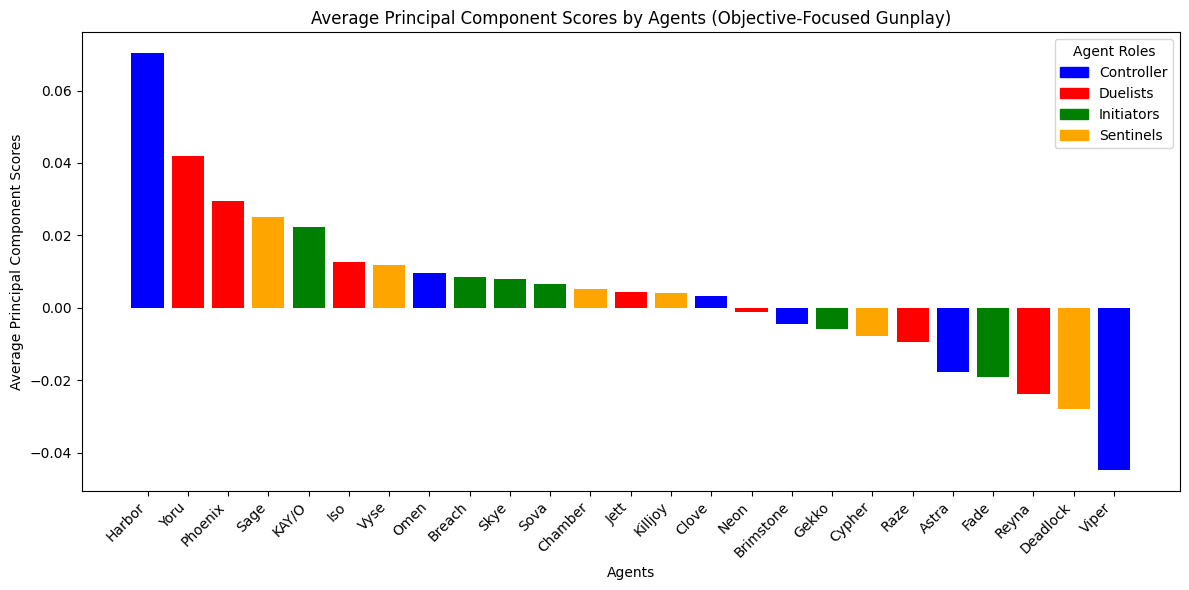

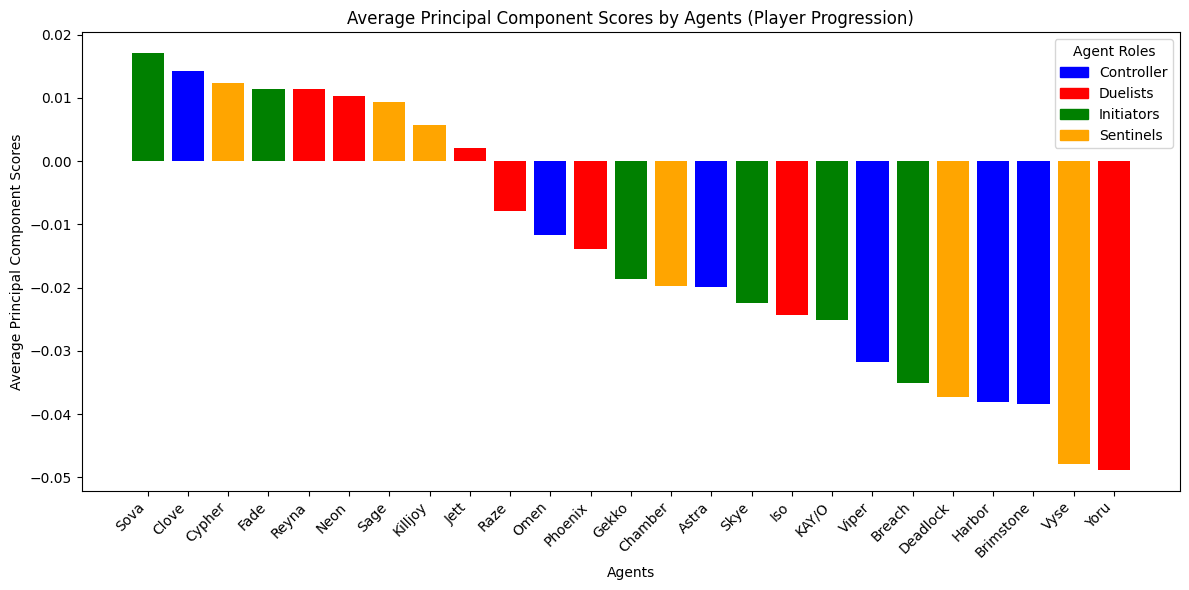

,PC: Combat Prowess,PC: Fragility Factor,PC: Utility-Based Teamwork,PC: Ability Focus,PC: Calculated Objective Play,PC: Gunfire Support,PC: Objective-Focused Gunplay,PC: Player Progression
agent_name,,,,,,,,
KAY/O,0.159659,0.001953,0.010049,-0.015565,0.004657,0.031807,0.022334,-0.025168
Omen,0.069289,-0.032721,0.030269,-0.016100,0.006058,-0.005682,0.009466,-0.011701
Deadlock,0.066348,-0.026803,0.054384,0.013228,-0.001773,0.009780,-0.027993,-0.037242
Vyse,0.042277,-0.086734,-0.023304,0.049185,-0.011451,0.012229,0.011685,-0.047930
Phoenix,0.041174,-0.001352,0.019143,-0.019481,-0.002087,-0.029134,0.029536,-0.013862
Harbor,0.019504,-0.025581,-0.024653,0.092369,0.013106,0.096712,0.070320,-0.038116
Astra,0.016000,-0.027364,0.007864,-0.005796,0.003500,0.022191,-0.017686,-0.019911
Skye,0.015657,0.000427,0.029788,0.017476,-0.019430,0.003860,0.007848,-0.022453
Clove,0.012062,-0.008373,-0.000501,-0.003125,0.000991,-0.005185,0.003130,0.014287


In [64]:
# Create the plots for PC scores by agent per PC ang get the tops and bottoms
all_pc_rankings = pd.DataFrame()

for i in range(1, num_pc+1):
    plt.figure(figsize=(12, 6))

    pc_scores = X_pca_final[:, i - 1]
    scores_df = pd.DataFrame({
        'agent_name': df2['agent_name'],
        'pc_scores': pc_scores,
        'agent_role': df2['agent_role']
    })

    avg_pc_scores = scores_df.groupby('agent_name')['pc_scores'].mean()
    avg_pc_scores = avg_pc_scores.sort_values(ascending=False)

    agent_roles_sorted = scores_df.groupby('agent_name')['agent_role'].first()[avg_pc_scores.index]

    role_colors = {'Controller': 'blue', 'Duelists': 'red', 'Initiators': 'green', 'Sentinels': 'orange'}

    legend_handles = []
    for role, color in role_colors.items():
        legend_handles.append(mpatches.Patch(color=color, label=role))

    plt.legend(handles=legend_handles, title='Agent Roles', loc='upper right')
    plt.bar(avg_pc_scores.index, avg_pc_scores.values, color=[role_colors[role] for role in agent_roles_sorted])
    plt.xlabel('Agents')
    plt.ylabel('Average Principal Component Scores')
    plt.title(f'Average Principal Component Scores by Agents ({pc_names[i]})')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    all_pc_rankings[f'PC: {pc_names[i]}'] = avg_pc_scores


display(all_pc_rankings)

In [65]:
all_pc_rankings.to_csv(OUTPUT_DIR + 'all_pc_rankings.csv')

#CHANGE THIS ANALYSIS - JUST DO THE FIRST 3

Some analyses:
- Combat Prowess

  - Duelists, a Controller, and a Sentinel Lead Combat Prowess. It's interesting to see that alongside the expected Duelists (red), Viper (blue), a Controller, and Vyse (orange), a Sentinel, take the first and second spots in the ranking. This suggests that players are effectively utilizing their kits for aggressive plays and securing kills, potentially challenging the conventional notion of Controllers and Sentinels being purely focused on utility, map control, and defensive strategies.
  -  Skye (green), an Initiator, also secures a high position. This highlights how Initiators can contribute significantly to combat by setting up opportunities for their team to engage and eliminate enemies.

- Fragility Factor
  - Viper, Yoru, Skye, and Raze are also at the top of PC2 scores about the vulnerability to damage and even death. Pairing this with the findings in PC1 (Combat Prowess), it can be surmised that these characters are often played aggressively and are always on the frontlines.

- Utility-based Teamwork
  - Sentinels, Controllers, and Initiators are expected to be seen in this PC given their supportive skills and ability to work with teammates to carry out the spike objective.
  - Killjoy, Astra, Gekko, Cypher leads here given their special abilities to gather and provide information for teammates to successfully plant or defuse the spike.

- Ability Focus
  - A different set of Sentinels, Controllers and Initiators lead in PC scores for Ability Focus. These plays are often a gambit between ability usage alone compared to the traditional gameplay.
  - Vyse, KAY/O, Skye, and Deadlock are agents that get used for their ability casting rather than gunplay, often with a losing probability.

- Calculated Objective Play
  - Sentinels and Controllers perform best here. The plays made by these support agents can make or break winning the round by succesfully planting or defusing the spike.
  - Killjoy, Viper, Chamber, Sage, and even Harbor can set up the playing field for a successful plant or defuse in a game.

- Gunfire Support
  - Deadlock, a Sentinel, and Yoru, a Duelist, leading the pack in "Gunfire Support." This suggests that players using these agents are effectively leveraging their kits to provide consistent damage and assists, even though their roles aren't typically associated with this playstyle.
  - Breach, another high-scoring agent, is an Initiator, further reinforcing the idea that this role can contribute significantly to team fights through disruption and creating opportunities for teammates to deal damage.
  - Clove, Brimstone, Harbor, Skye, and Sage stand out with particularly low scores, reinforcing their focus on abilities and strategic play rather than consistent damage output and assist generation.

- Objective-Focused Gunplay
  - It's intriguing to see Controllers (blue) like Harbor and Viper leading the pack, alongside Initiators (green) like Gekko and KAY/O. This suggests that these agents, often associated with utility and map control or initiating engagements, are also adept at using their weapons to create opportunities for planting or defusing the Spike.
  - Phoenix, a Duelist (red), also scores high, indicating that some Duelists can effectively combine their aggressive gunplay with objective-focused actions.
  - Deadlock, Astra, Fade, Cypher, and Raze stand out with particularly low scores, reinforcing their focus on other aspects of the game, such as locking down areas, gathering information, or securing kills.
  - While "Gunfire Support" focuses on providing consistent damage and assists during engagements, "Objective-Focused Gunplay" emphasizes using gunplay specifically to enable planting or defusing the Spike. This distinction is evident in the different agents that excel in each PC. For example, Deadlock and Yoru score high in "Gunfire Support" but relatively lower in "Objective-Focused Gunplay," while Harbor and Gekko show the opposite trend.

- Player Progression
  - The plot suggests that certain agents, like Viper, Yoru, Harbor, Killjoy, and Deadlock, might be more popular among experienced and higher-ranked players. However, it's important to note the diversity of roles among these agents, indicating that player progression is not limited to a specific role preference.
  - This hints at the possibility of playstyle evolution as players progress in Valorant, with potential shifts in agent preferences and a focus on different aspects of the game.
  

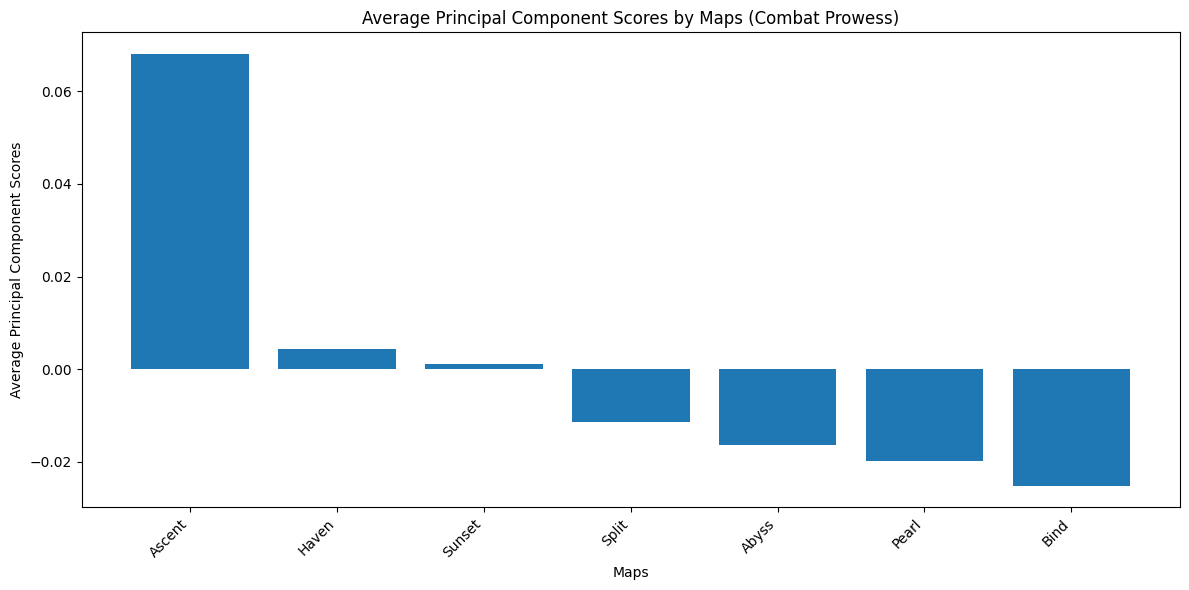

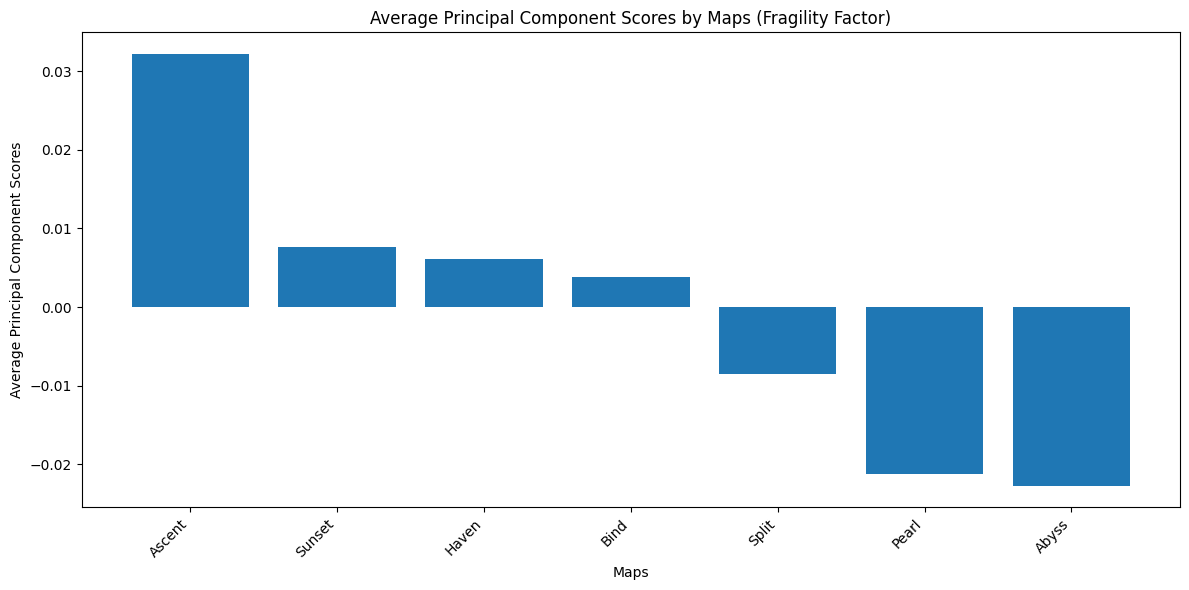

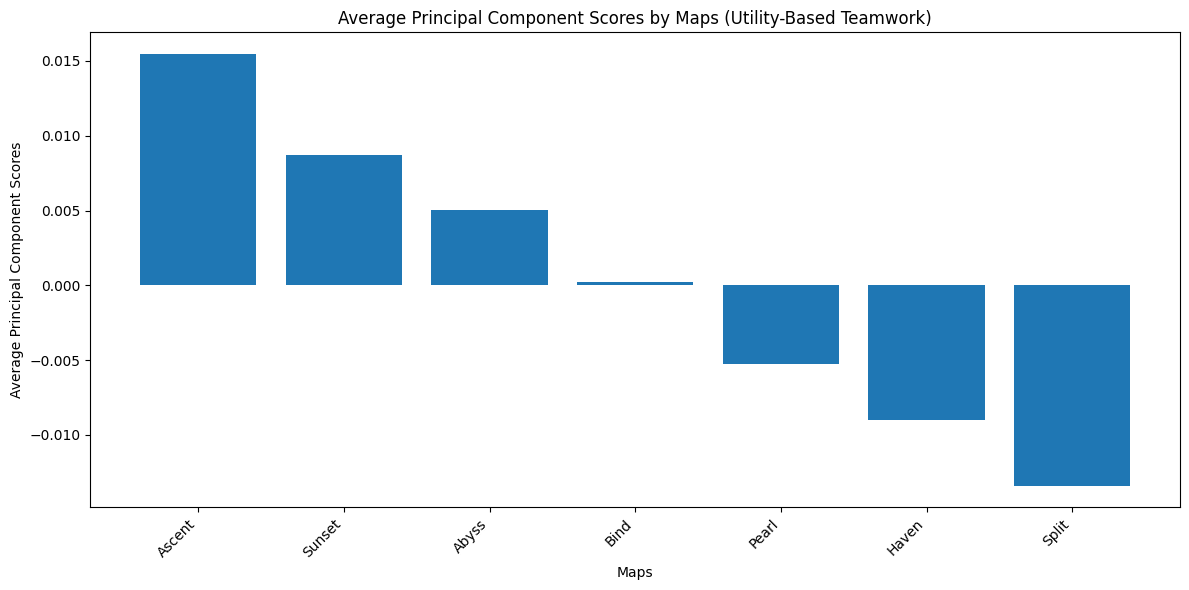

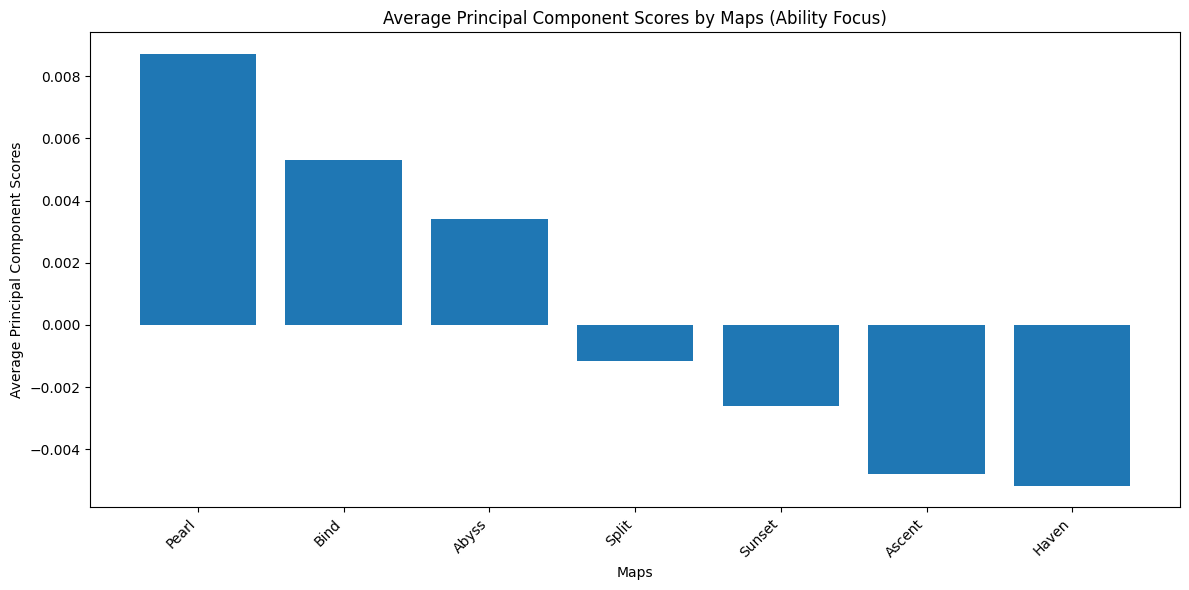

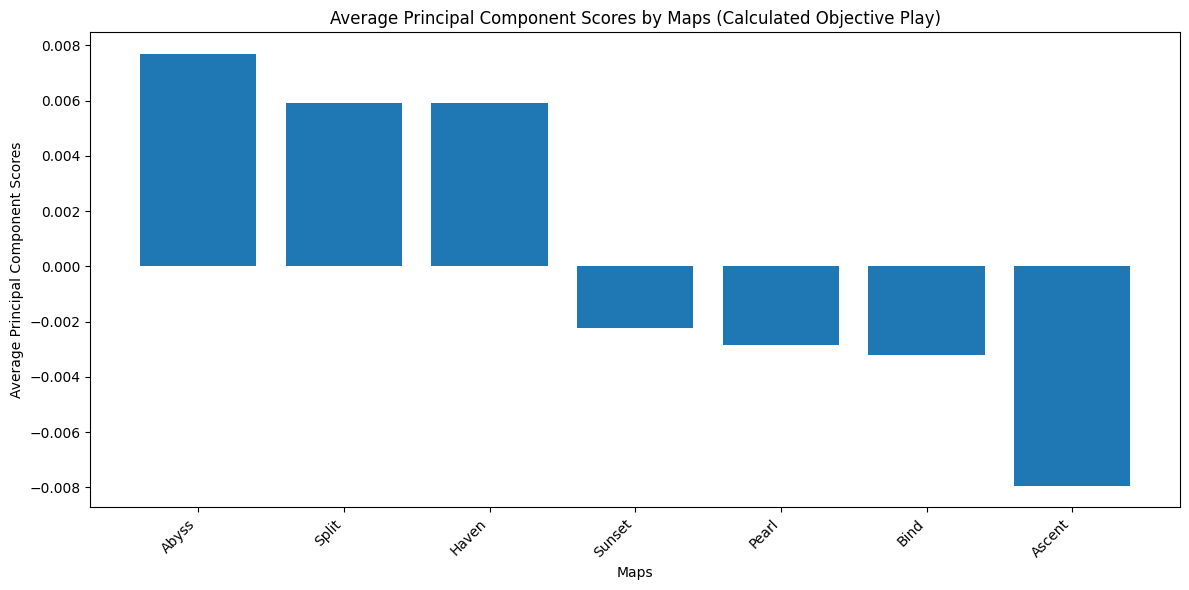

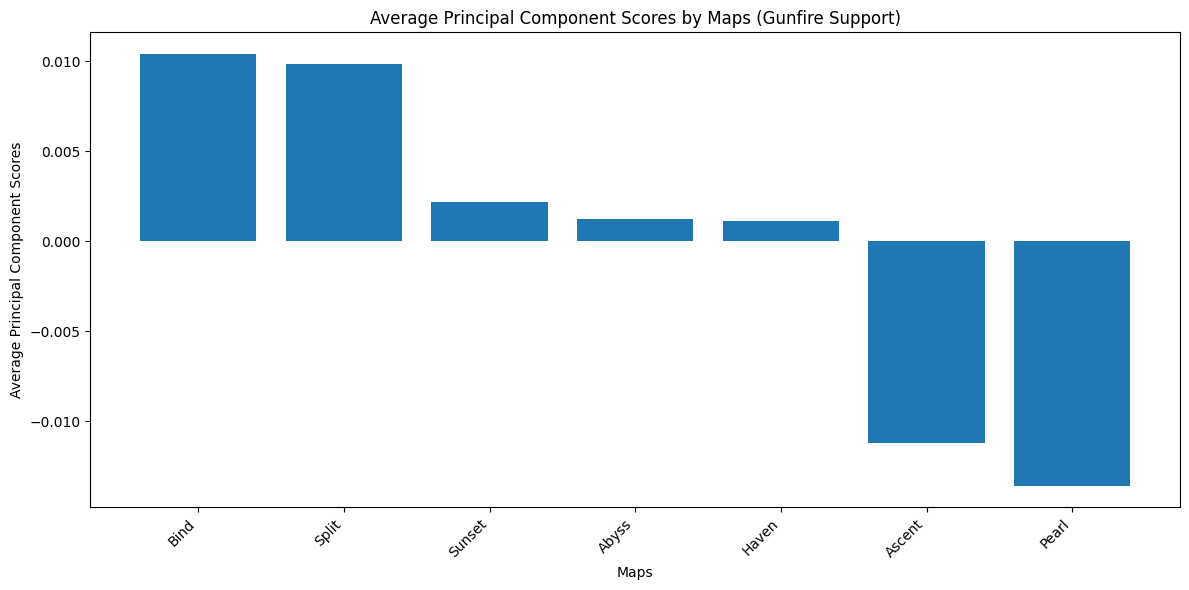

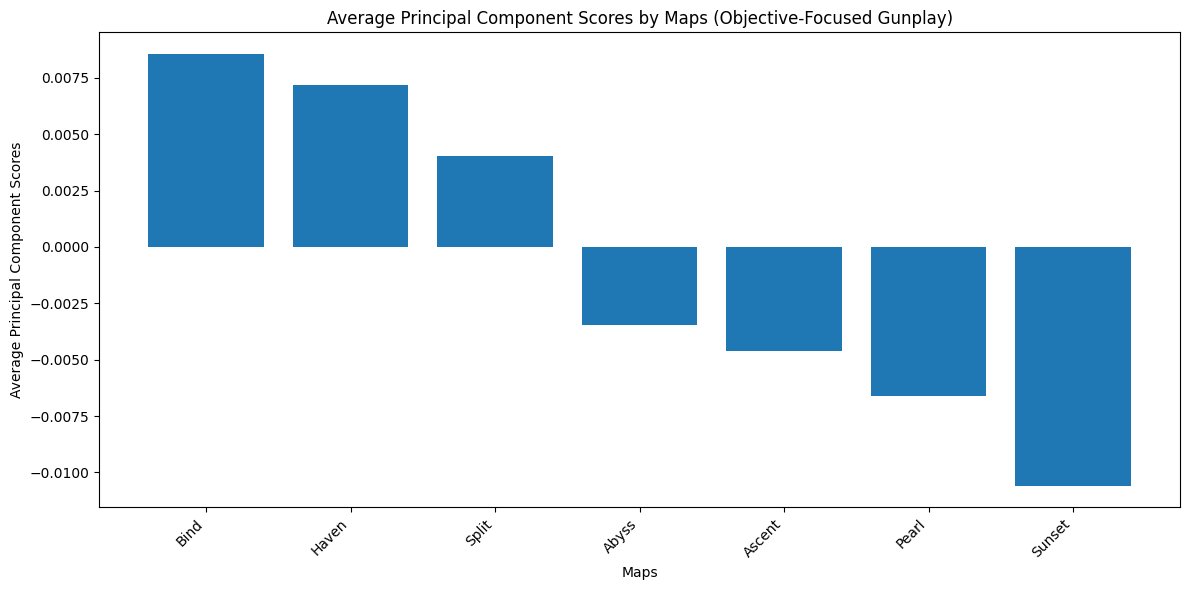

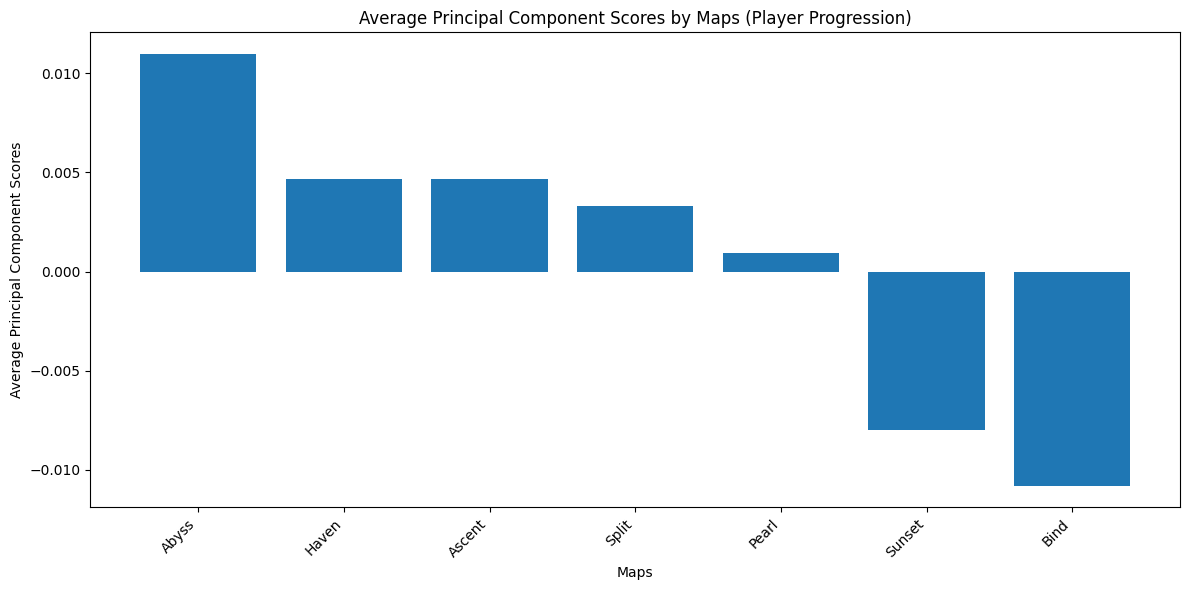

,Map,PC: Combat Prowess,PC: Fragility Factor,PC: Utility-Based Teamwork,PC: Ability Focus,PC: Calculated Objective Play,PC: Gunfire Support,PC: Objective-Focused Gunplay,PC: Player Progression
0,Abyss,-0.016370,-0.022753,0.005050,0.003402,0.007687,0.001224,-0.003439,0.010963
1,Ascent,0.068062,0.032219,0.015469,-0.004778,-0.007937,-0.011191,-0.004594,0.004640
2,Bind,-0.025166,0.003776,0.000225,0.005313,-0.003210,0.010394,0.008559,-0.010794
3,Haven,0.004336,0.006166,-0.009021,-0.005170,0.005902,0.001095,0.007200,0.004652
4,Pearl,-0.019886,-0.021279,-0.005259,0.008716,-0.002826,-0.013576,-0.006589,0.000909
5,Split,-0.011473,-0.008492,-0.013399,-0.001169,0.005920,0.009812,0.004053,0.003325
6,Sunset,0.001155,0.007679,0.008705,-0.002593,-0.002214,0.002186,-0.010587,-0.007995


In [66]:
# Create the plots for PC scores by map per PC
map_pc_rankings = pd.DataFrame()

for i in range(1, num_pc + 1):
    plt.figure(figsize=(12, 6))

    pc_scores = X_pca_final[:, i - 1]
    scores_df = pd.DataFrame({
        'map_name': df2['map_name'],
        'pc_scores': pc_scores
    })

    # Filter out unwanted maps
    filtered_scores_df = scores_df[~scores_df['map_name'].isin(['Lotus', 'Breeze', 'Icebox', 'Fracture'])]

    avg_pc_scores = filtered_scores_df.groupby('map_name')['pc_scores'].mean()
    avg_pc_scores = avg_pc_scores.sort_values(ascending=False)

    plt.bar(avg_pc_scores.index, avg_pc_scores.values)
    plt.xlabel('Maps')
    plt.ylabel('Average Principal Component Scores')
    plt.title(f'Average Principal Component Scores by Maps ({pc_names[i]})')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    pc_map_rankings = avg_pc_scores.reset_index().rename(columns={'map_name': 'Map', 'pc_scores': f'PC: {pc_names[i]}'})

    if map_pc_rankings.empty:
        map_pc_rankings = pc_map_rankings
    else:
        map_pc_rankings = pd.merge(map_pc_rankings, pc_map_rankings, on='Map', how='outer')

display(map_pc_rankings)

Ability Focus





#CHANGE THIS ANALYSIS - JUST DO THE FIRST 3

Some analyses:
- Combat Prowess (PC1), Fragility Factor(PC2) and Utility-based Teamwork(PC3)

  - The map Bind encourages aggressive gameplay, offering a high-risk, high-reward environment with both high kill potential and vulnerability.  Surprisingly, even agents typically focused on support find success pushing forward and securing kills, utilizing the map's teleportation portal and their abilities for creative plays and Spike plants.  This aggressive atmosphere, combined with Bind's tight spaces, demands coordinated teamwork and clever ability usage for success.  In contrast, Haven, with its three bomb sites, necessitates a more spread-out approach, making coordinated pushes more complex. This often leads to individual plays and gunfights taking priority over teamwork and utility usage.

- Ability Focus(PC4), Calculated Objective Play(PC5) and Gunfire Support(PC6)

  - Pearl offers a balanced layout with two Spike sites and three lanes, prioritizing tactical gameplay over gimmicks like teleporters and rotating doors, which aligns with the need for "Calculated Objective Play."  Its blend of open spaces and narrow corridors encourages diverse combat engagements, rewarding precise aiming and contributing to a higher "Ability Focus" and "Gunfire Support". As Pearl's layout provides many opportunities for combat, it has a high correlation on PCs that highlight the strategic use of abilities and firearms in order to successfully plant or defuse at the two Spike sites.


- Objective-Focused Gunplay(PC7)

  - The open mid areas on Pearl and Sunset reward precise gunplay and aggressive pushes, making winning duels crucial for map control and, ultimately, victory. Players who can consistently secure these advantageous positions gain an edge when planting or defusing the Spike, as these maps favor precise aiming and quick reflexes. In contrast, Bind, with its tighter spaces, requires a more strategic and coordinated approach, prioritizing teamwork and ability usage to navigate the map and secure objectives.

- Player Progression(PC8)

  - Although map picks are randomized in Valorant, the chart reveals interesting trends in "Player Progression" across different maps, potentially influenced by map familiarity and age. Ascent and Split were among the early maps released, suggesting experienced players might be more familiar with their layouts and strategic possibilities. In contrast, Abyss, Pearl, and Sunset are newer additions, where players are still learning the nuances and haven't fully explored the strategic depth found in older maps. Bind and Haven seem to host a balanced mix of experience levels, catering to both newer and veteran players. This analysis suggests that map preference and performance could be linked to player progression, with certain maps potentially serving as indicators of deeper strategic understanding.

In [67]:
map_pc_rankings.to_csv(OUTPUT_DIR + 'map_pc_rankings.csv')

#Baseline Recommendations

The recommendations are based solely on the sum of the average scores of agents across all 8 PCs per map.

In [68]:
pc_names = pc_df.columns.tolist()

In [69]:
map_names = df2['map_name'].unique().tolist()

In [70]:
'''This is to invert signs of PC2
because we want a original meaning of PC2 is: high PC2 score = more fragile.
If we want a good agent, we want a less fragile less losing agent.
Inverting the signs should do the trick.
'''

df2['PC2']=-df2['PC2']

In [71]:
def recommended_agents_table_overall(df, pc_names, num_agents=5):
    """Creates a table of recommended agents with separate agent and score columns, regardless of the map."""
    agent_pc_scores = df.groupby('agent_name')[pc_names].mean()
    agent_pc_scores['total_pc_score'] = agent_pc_scores.sum(axis=1)
    recommended_agents = agent_pc_scores.sort_values('total_pc_score', ascending=False).index.tolist()
    top_agents = recommended_agents[:num_agents]
    recommendations_df = pd.DataFrame({
        'Agent': top_agents,
        'Score': [agent_pc_scores.loc[agent, 'total_pc_score'] for agent in top_agents]
    })
    return recommendations_df

In [72]:
recommended_agents_table_overall(df2, pc_names, num_agents=7)

,Agent,Score
0,Harbor,0.254824
1,KAY/O,0.185819
2,Vyse,0.119424
3,Omen,0.114320
4,Deadlock,0.103535
5,Viper,0.090515
6,Astra,0.033527


In [73]:
import pandas as pd

def recommended_agents_table(df, pc_names, maps, num_agents=5):
    """Creates a table of recommended agents per map with separate agent and score columns."""
    all_recommendations = {}
    for map_name in maps:
        map_data = df[df['map_name'] == map_name]
        agent_pc_scores = map_data.groupby('agent_name')[pc_names].mean()
        agent_pc_scores['total_pc_score'] = agent_pc_scores.sum(axis=1)
        recommended_agents = agent_pc_scores.sort_values('total_pc_score', ascending=False).index.tolist()
        top_agents = recommended_agents[:num_agents]

        all_recommendations[map_name] = {agent: agent_pc_scores.loc[agent, 'total_pc_score'] for agent in top_agents}

    columns = []
    for map_name in maps:
        columns.extend([(map_name, 'Agent'), (map_name, 'Score')])

    recommendations_df = pd.DataFrame(index=range(5), columns=pd.MultiIndex.from_tuples(columns))

    for map_name in maps:
        for i, (agent, score) in enumerate(all_recommendations[map_name].items()):
            recommendations_df.loc[i, (map_name, 'Agent')] = agent
            recommendations_df.loc[i, (map_name, 'Score')] = score

    return recommendations_df

In [74]:
recommended_agents_table(df2, pc_names, map_names, num_agents=7)

Ascent                Abyss              Sunset                Haven  \
   Agent     Score      Agent     Score     Agent     Score      Agent   
0  Viper   1.70906      KAY/O   0.42937     KAY/O  0.511199     Harbor   
1  Gekko  0.520915     Harbor  0.416631   Killjoy  0.442378  Brimstone   
2   Vyse  0.403647       Vyse  0.243513      Skye  0.407198      Clove   
3  KAY/O  0.361142  Brimstone  0.194501      Vyse  0.280731       Skye   
4   Omen  0.277778      Reyna  0.171891  Deadlock  0.219659     Cypher   
5  Astra  0.246548      Gekko  0.121849      Sage   0.13251       Jett   
6   Fade   0.22895      Astra  0.121062    Cypher   0.06349       Omen   

                Split                Pearl                Bind            \
      Score     Agent     Score      Agent     Score     Agent     Score   
0  1.799572    Harbor  2.109875       Skye  0.210242     KAY/O  0.768596   
1  0.312666   Phoenix  0.628888     Harbor  0.197229     Viper  0.365189   
2  0.105437     Viper  0.501498       Raze  0.171756  Deadlock  0.331326   
3  0.095487  Deadlock  0.304377    Chamber  0.128309      Sova  0.189385   
4  0.066138      Vyse  0.301839    Phoenix   0.11747     Astra  0.138052   
5  0.053062      Fade  0.185035  Brimstone  0.111278      Yoru  0.124012   
6  0.050384      Omen  0.176991        Iso  0.057793      Jett  0.100471   

    Icebox              Lotus            
     Agent     Score    Agent     Score  
0     Vyse  2.463725     Sage  5.018282  
1     Omen  2.098707     Omen  1.703989  
2    Gekko  1.795141  Phoenix  1.529281  
3     Fade  1.307182     Skye  1.177253  
4     Raze   0.46285    Viper  1.110715  
5   Harbor  0.419543      Iso  0.763109  
6  Phoenix  0.386549     Raze  0.393432

In [75]:
def recommended_agents_by_role_overall(df, pc_names, num_agents=1):
    """Creates a table of recommended agents per role with specified number of agents per role,
    without considering maps, breaking agents into rows per role if num_agents > 1."""
    all_recommendations = []  # Store recommendations as a list of dictionaries

    for role in df['agent_role'].unique():
        role_data = df[df['agent_role'] == role]
        agent_pc_scores = role_data.groupby('agent_name')[pc_names].mean()
        agent_pc_scores['total_pc_score'] = agent_pc_scores.sum(axis=1)

        top_agents = agent_pc_scores.sort_values('total_pc_score', ascending=False).head(num_agents).index.tolist()
        top_scores = agent_pc_scores.sort_values('total_pc_score', ascending=False).head(num_agents)['total_pc_score'].tolist()

        for i in range(num_agents):  # Iterate to create separate rows for each agent
            if i < len(top_agents):
                all_recommendations.append({
                    'Role': role,
                    'Agent': top_agents[i],
                    'Score': top_scores[i]
                })

    recommendations_df = pd.DataFrame(all_recommendations)
    return recommendations_df

In [76]:
recommended_agents_by_role_overall(df2, pc_names, 3)

,Role,Agent,Score
0,Initiators,KAY/O,0.185819
1,Initiators,Skye,0.032319
2,Initiators,Sova,0.027988
3,Duelists,Phoenix,0.026641
4,Duelists,Reyna,0.013655
5,Duelists,Jett,-0.002814
6,Sentinels,Vyse,0.119424
7,Sentinels,Deadlock,0.103535
8,Sentinels,Cypher,0.006919
9,Controller,Harbor,0.254824


In [77]:
def recommended_agents_by_role_table(df, pc_names, maps, num_agents=1):
    """Creates a table of recommended agents per map with specified number of agents per role,
    maps as top-level columns, and roles as rows (without a separate Map column)."""
    all_recommendations = {}
    for map_name in maps:
        all_recommendations[map_name] = {}
        map_data = df[df['map_name'] == map_name]
        for role in map_data['agent_role'].unique():
            role_data = map_data[map_data['agent_role'] == role]
            agent_pc_scores = role_data.groupby('agent_name')[pc_names].mean()
            agent_pc_scores['total_pc_score'] = agent_pc_scores.sum(axis=1)

            top_agents = agent_pc_scores.sort_values('total_pc_score', ascending=False).head(num_agents).index.tolist()

            all_recommendations[map_name][role] = {
                'agent': top_agents,
                'score': agent_pc_scores.loc[top_agents, 'total_pc_score'].tolist()
            }

    columns = pd.MultiIndex.from_product([maps, ['Agent', 'Score']], names=['Map', ''])

    roles_index = pd.MultiIndex.from_product([['Controller', 'Duelists', 'Initiators', 'Sentinels'], range(num_agents)])
    recommendations_df = pd.DataFrame(index=roles_index, columns=columns)

    for map_name in maps:
        for role in ['Controller', 'Duelists', 'Initiators', 'Sentinels']:
            if role in all_recommendations[map_name]:
                for i in range(num_agents):
                    if i < len(all_recommendations[map_name][role]['agent']):
                        recommendations_df.loc[(role, i), (map_name, 'Agent')] = all_recommendations[map_name][role]['agent'][i]
                        recommendations_df.loc[(role, i), (map_name, 'Score')] = all_recommendations[map_name][role]['score'][i]

    return recommendations_df

In [78]:
recommended_agents_by_role_table(df2, pc_names, map_names, 3)

Map            Ascent                Abyss              Sunset            \
                Agent     Score      Agent     Score     Agent     Score   
Controller 0    Viper   1.70906     Harbor  0.416631     Clove  0.016728   
           1     Omen  0.277778  Brimstone  0.194501      Omen  0.005624   
           2    Astra  0.246548      Astra  0.121062    Harbor   -0.0686   
Duelists   0     Neon  0.171169      Reyna  0.171891       Iso  0.033849   
           1    Reyna  0.057284       Jett  0.035206      Neon -0.010604   
           2     Yoru  0.045348        Iso  0.033233   Phoenix -0.034101   
Initiators 0    Gekko  0.520915      KAY/O   0.42937     KAY/O  0.511199   
           1    KAY/O  0.361142      Gekko  0.121849      Skye  0.407198   
           2     Fade   0.22895       Sova  0.021158      Sova  0.045282   
Sentinels  0     Vyse  0.403647       Vyse  0.243513   Killjoy  0.442378   
           1   Cypher  0.047159    Chamber -0.041234      Vyse  0.280731   
           2  Killjoy  0.012642   Deadlock -0.051974  Deadlock  0.219659   

Map               Haven               Split                Pearl            \
                  Agent     Score     Agent     Score      Agent     Score   
Controller 0     Harbor  1.799572    Harbor  2.109875     Harbor  0.197229   
           1  Brimstone  0.312666     Viper  0.501498  Brimstone  0.111278   
           2      Clove  0.105437      Omen  0.176991      Astra  0.055988   
Duelists   0       Jett  0.053062   Phoenix  0.628888       Raze  0.171756   
           1      Reyna  0.036358       Iso  0.004901    Phoenix   0.11747   
           2       Neon -0.014384     Reyna  -0.03217        Iso  0.057793   
Initiators 0       Skye  0.095487      Fade  0.185035       Skye  0.210242   
           1       Sova  0.027044    Breach  0.124626       Fade  0.036474   
           2      Gekko  0.008211      Skye  0.070413     Breach -0.207287   
Sentinels  0     Cypher  0.066138  Deadlock  0.304377    Chamber  0.128309   
           1    Chamber  0.002443      Vyse  0.301839    Killjoy  0.000735   
           2       Sage -0.048369   Chamber  0.166063     Cypher -0.015523   

Map               Bind             Icebox              Lotus            
                 Agent     Score    Agent     Score    Agent     Score  
Controller 0     Viper  0.365189     Omen  2.098707     Omen  1.703989  
           1     Astra  0.138052   Harbor  0.419543    Viper  1.110715  
           2      Omen -0.017247    Viper  0.013128    Clove -0.735547  
Duelists   0      Yoru  0.124012     Raze   0.46285  Phoenix  1.529281  
           1      Jett  0.100471  Phoenix  0.386549      Iso  0.763109  
           2     Reyna  0.079955      Iso -0.129693     Raze  0.393432  
Initiators 0     KAY/O  0.768596    Gekko  1.795141     Skye  1.177253  
           1      Sova  0.189385     Fade  1.307182    Gekko  0.097445  
           2    Breach -0.022733     Sova -0.445571     Fade -0.317382  
Sentinels  0  Deadlock  0.331326     Vyse  2.463725     Sage  5.018282  
           1      Vyse -0.000162     Sage  0.006184  Killjoy  0.178567  
           2    Cypher -0.005824  Killjoy -0.590753     Vyse  0.147386

In [79]:
def recommend_teammates_with_map(df, agent_name, map_name, pc_names, num_lowest=4, num_recommendations=4):
    """Recommends teammates for a specific agent on a specific map based on their mean PC scores and compensating for their lowest PC scores."""

    map_data = df[df['map_name'] == map_name]

    agent_data = map_data[map_data['agent_name'] == agent_name]
    mean_pc_scores = agent_data[pc_names].mean()

    lowest_pcs = mean_pc_scores.nsmallest(num_lowest).index

    other_agents = map_data[map_data['agent_name'] != agent_name]
    agent_scores = other_agents.groupby('agent_name')[lowest_pcs].mean()
    agent_scores['total_score'] = agent_scores.sum(axis=1)
    recommended_agents = agent_scores.sort_values('total_score', ascending=False).head(num_recommendations).index.tolist()

    print(f"Recommended teammates for {agent_name} on {map_name}:")
    for agent in recommended_agents:
        print(agent)

In [80]:
recommend_teammates_with_map(df2, 'Killjoy', 'Sunset', pc_names)

Recommended teammates for Killjoy on Sunset:
KAY/O
Vyse
Sage
Skye


In [81]:
recommend_teammates_with_map(df2, 'KAY/O', 'Sunset', pc_names)

Recommended teammates for KAY/O on Sunset:
Sage
Skye
Deadlock
Phoenix


In [82]:
recommend_teammates_with_map(df2, 'Iso', 'Sunset', pc_names)

Recommended teammates for Iso on Sunset:
Harbor
Skye
KAY/O
Killjoy
